# Introducción a las APIs

Cuando queremos extraer datos de internet la forma más complicada es mediante el scraping y éste debe ser el último recurso.

Antes de eso lo ideal es comprobar si la web o servicio del que queremos extraer datos dispone de una API. API significa "interfaz de programación de aplicaciones" y son protocolos y mecanismos que permiten a los softwares intercambiar información.

Las APIs pueden ser públicas o de pago. Algunas además necesitan registro y autenticación.

La información además puede venir en diferentes formatos. El formato mas común actualmente es [JSON](https://developer.mozilla.org/es/docs/Learn/JavaScript/Objects/JSON), aunque antes se usaba más [XML](https://es.wikipedia.org/wiki/Extensible_Markup_Language).

En github podemos encontrar el repositorio [public-apis](https://github.com/public-apis/public-apis) donde podremos consultar cientos de APIs donde obtener datos.

Existen diferentes tipos de APIs: Soap, WPC, Websocket, REST... Vamos a entrar sólo en las REST que son las más populares.


## REST

REST significa transferencia de estado representacional y es la forma más popular de comunicación de APIs hoy en día. Esta forma de comunicación consiste en que un cliente realiza una una solicitud a un servidor como datos, el servidor realiza un conjunto de funciones definidas y devuelve unos datos de salida.

REST define un conjunto de funciones. Las más importantes son GET, PUT, PATCH, POST y DELETE.

Vamos a centrarnos en las peticiones GET.

## Peticiones GET

Las peticiones GET sirven para pedir información. Si la petición ha ido bien el servidor devuelve un [código 200](https://developer.mozilla.org/es/docs/Web/HTTP/Status) y la información que hemos pedido.

Tomemos ahora el ejemplo de un navegador web. Cuando en un navegador le indicamos una dirección web lo que está pasando es que nuestro navegador está haciendo una petición GET a esa página. Si todo va bien, el servidor al que le hacemos la petición devolverá el código HTML que usará el navegador para construir la web.

Veamos como hacer esto con Python usando la [librería requests](https://requests.readthedocs.io):

In [1]:
import requests

x = requests.get("https://www.google.es")

Si hacemos un print de la petición que hemos hecho nos devolverá el código de nuestra petición.

In [2]:
print(x)

<Response [200]>


Y si imprimiemos la propiedad text nos devolverá en formato texto lo que nos ha devuelto el servidor.

In [3]:
print(x.text)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="es"><head><meta content="Google.es permite acceder a la información mundial en castellano, catalán, gallego, euskara e inglés." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2024/seasonal-holidays-2024-6753651837110333-law.gif" itemprop="image"><meta content="Temporada navideña 2024" property="twitter:title"><meta content="¡Felices fiestas! #GoogleDoodle" property="twitter:description"><meta content="¡Felices fiestas! #GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2024/seasonal-holidays-2024-6753651837110333-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/doodles/2024/seasonal-holidays-2024-6753651837110333-2xa.gif" 

Vamos ahora a ver como trabajar con una API de internet para extraer datos. Tras examinar el repositorio de [public-apis](https://github.com/public-apis/public-apis) vamos a usar por ejemplo la API de [arbeitnow](http://www.arbeitnow.com), un buscador de empleo alemán. 

La documentación de la API la podemos encontrar en la dirección https://documenter.getpostman.com/view/18545278/UVJbJdKh

Vamos ahora a hacer la petición utilizando la librería requests.

In [4]:
x = requests.get("https://www.arbeitnow.com/api/job-board-api")

Para ver el JSON con los datos que recibimos tendremos que utilizar el método json.

In [5]:
x.json()

{'data': [{'slug': 'web-developer-hamburg-7887',
   'company_name': 'hansetherm GmbH',
   'title': 'Web Developer (m/w/d)',
   'description': '<p>Bei hansetherm sind wir die Vorreiter einer nachhaltigen Energiezukunft. Als Hamburger Start-up sind wir fest entschlossen, die Energiewende mitzugestalten und zu beschleunigen.</p>\n<p>Mit unserer Eigenmarke bieten wir nicht nur zuverlässige Produkte an, sondern entwickeln auch maßgeschneiderte Lösungen für eine grünere Zukunft. Unser gesamtes Team brennt dafür, die Welt zu verändern und die Energiebranche zu revolutionieren.</p>\n<p>Um diese Vision zu erreichen, suchen wir ab sofort eine engagierte und zuverlässige Person als Web Developer (m/w/d) .</p>\n<h2>Aufgaben</h2>\n<ul>\n<li>Wartung, Weiterentwicklung und Betreuung aller Webseiten der hansetherm GmbH sowie Durchführung von regelmäßigen Optimierungen</li>\n<li>Implementierung von Funktionstests von internen &#x26; externen Softwarelösungen</li>\n<li>Entwicklung von Responsive Webdesi

El método json nos devuelve un diccionario

In [6]:
type(x.json())

dict

Así que podremos usar los métodos de los diccionarios para manipular los datos:

In [7]:
x.json().keys()

dict_keys(['data', 'links', 'meta'])

In [8]:
x.json()["data"][0]

{'slug': 'web-developer-hamburg-7887',
 'company_name': 'hansetherm GmbH',
 'title': 'Web Developer (m/w/d)',
 'description': '<p>Bei hansetherm sind wir die Vorreiter einer nachhaltigen Energiezukunft. Als Hamburger Start-up sind wir fest entschlossen, die Energiewende mitzugestalten und zu beschleunigen.</p>\n<p>Mit unserer Eigenmarke bieten wir nicht nur zuverlässige Produkte an, sondern entwickeln auch maßgeschneiderte Lösungen für eine grünere Zukunft. Unser gesamtes Team brennt dafür, die Welt zu verändern und die Energiebranche zu revolutionieren.</p>\n<p>Um diese Vision zu erreichen, suchen wir ab sofort eine engagierte und zuverlässige Person als Web Developer (m/w/d) .</p>\n<h2>Aufgaben</h2>\n<ul>\n<li>Wartung, Weiterentwicklung und Betreuung aller Webseiten der hansetherm GmbH sowie Durchführung von regelmäßigen Optimierungen</li>\n<li>Implementierung von Funktionstests von internen &#x26; externen Softwarelösungen</li>\n<li>Entwicklung von Responsive Webdesigns</li>\n<li>Du

La clave "data" contiene una lista con los datos de cada uno de los empleos. Hagamos un mini análisis con los datos, veamos en que ciudad surgen más empleos y si el número de habitantes tiene algo que ver.

Vamos a iterar por cada uno de los elementos de data, veamos la localización y contemos cuantas veces se repite cada una de ellas.

In [9]:
towns = {}

for job in x.json()["data"]:
    location_job = job.get("location")
    if location_job:
        if location_job in towns.keys():
            towns[location_job] += 1
        else:
            towns[location_job] = 1

In [10]:
towns

{'Hamburg': 6,
 'Munich': 10,
 'Berlin': 23,
 'Wolfsburg': 1,
 'Gaggenau': 1,
 'Oldenburg': 1,
 'Cologne': 1,
 'Nuremberg': 2,
 'Hagen': 1,
 'Leipzig': 5,
 'Dresden': 2,
 'Mannheim': 6,
 'Walldorf': 1,
 'Gilching': 1,
 'Frankfurt': 4,
 'Heidelberg': 1,
 'Pfullendorf': 1,
 'Osnabrück': 1,
 'Karlsruhe': 3,
 'Stuttgart': 3,
 'Ohlsbach': 1,
 'Düsseldorf': 3,
 'Tübingen': 1,
 'Darmstadt': 1,
 'Gräfelfing': 1,
 'Cottbus': 1,
 'Göppingen': 1,
 'Remshalden': 1,
 'Angelburg': 1,
 'Möckmühl': 1,
 'Berlin, Berlin, Germany': 2,
 'Wernigerode': 1,
 'Witten': 1,
 'Großwallstadt': 1,
 'Saarbrücken': 1,
 'Fulda': 1,
 'Kirchheim bei München': 2,
 'Herzogenrath': 1,
 'Michelfeld': 1,
 'Rosenheim': 1,
 'Weinstadt': 1,
 'Dortmund': 1}

Ahora tenemos que ver los habitantes de cada una de las ciudades. Vamos a extraer los datos de población de un [artículo](https://es.wikipedia.org/wiki/Anexo:Ciudades_de_Alemania_por_poblaci%C3%B3n) de la wikipedia, utilizando para ello la librería pandas.

In [11]:
import pandas as pd

wiki = "https://es.wikipedia.org/wiki/Anexo:Ciudades_de_Alemania_por_poblaci%C3%B3n"

data = pd.read_html(wiki)

data

[    0                           1
 0 NaN             Capital Federal
 1 NaN  Capital de Estado Federado,
     Rango  Escudo          Nombre Población en 1990 Población en 2000  \
 0       1     NaN          Berlín         3 433 695         3 382 169   
 1       2     NaN        Hamburgo         1 652 363         1 715 392   
 2       3     NaN          Múnich         1 229 026         1 210 223   
 3       4     NaN         Colonia           953 551           962 884   
 4       5     NaN       Fráncfort           644 865           646 550   
 ..    ...     ...             ...               ...               ...   
 77     78     NaN          Siegen           109 174           108 476   
 78     79     NaN       Gütersloh            86 807            95 156   
 79     80     NaN      Hildesheim           105 291           103 909   
 80     81     NaN           Hanau            88 294            88 637   
 81     82     NaN  Kaiserslautern            99 351            99 825   
 
    

Podemos ver como son extraídas cada una de las tablas. La que nos interesa es la segunda, que es la que contiene los datos de población.

In [12]:
data[1]

,Rango,Escudo,Nombre,Población en 1990,Población en 2000,Población en 2005,Población en 2010[1]​,Población en 2020,Población en 2022,Área (km²),Pob. por km²,Crecimiento %,Estado (Bundesland),Año en que superó 100 000 hab.
0,1,NaN,Berlín,3 433 695,3 382 169,3 395 189,3 460 725,3 664 088,3 755 251,89182,3807.0,6.0,Berlín,1740
1,2,NaN,Hamburgo,1 652 363,1 715 392,1 743 627,1 786 448,1 852 478,1 892 122,75524,2309.0,27.0,Hamburgo,1787
2,3,NaN,Múnich,1 229 026,1 210 223,1 259 677,1 353 186,1 488 202,1 512 491,31046,4057.0,68.0,Baviera,1854
3,4,NaN,Colonia,953 551,962 884,983 347,1 007 119,1 083 498,1 084 831,40515,2427.0,35.0,Renania del Norte-Westfalia,1855
4,5,NaN,Fráncfort,644 865,646 550,651 899,679 664,764 104,773 068,24831,2625.0,14.0,Hesse,1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,NaN,Siegen,109 174,108 476,106 293,103 424,101 943,102 560,11467,927.0,-34.0,Renania del Norte-Westfalia,1975
78,79,NaN,Gütersloh,86 807,95 156,-,96404,100 664,102 393,11202,NaN,NaN,Renania del Norte-Westfalia,2018
79,80,NaN,Hildesheim,105 291,103 909,102 575,102 794,101 055,101 858,9257,1108.0,-21.0,Baja Sajonia,1974
80,81,NaN,Hanau,88 294,88 637,-,88.637,97 137,101 364,7674,NaN,NaN,Hesse,2022


Y veamos el nombre de sus columnas

In [13]:
data[1].columns

Index(['Rango', 'Escudo', 'Nombre', 'Población en 1990', 'Población en 2000',
       'Población en 2005', 'Población en 2010[1]​', 'Población en 2020',
       'Población en 2022', 'Área (km²)', 'Pob. por km²', 'Crecimiento %',
       'Estado (Bundesland)', 'Año en que superó 100 000 hab.'],
      dtype='object')

Vamos a quedarnos con la tabla con los datos que queremos y vamos a renombrar las columnas con unos nombres con los que sea más fácil de trabajar.

In [14]:
data = data[1]

In [15]:
data = data[["Nombre", "Población en 2022"]]
data.columns = ["nombre", "poblacion"]

Para poder unir las tablas necesitamos que los nombres de las ciudades de la tabla de wikipedia y los de la API coincidan. Vamos a intentar estandarizar los valores eliminando los caracteres extraños. Para ello utilizaremos la librería unidecode.

In [16]:
from unidecode import unidecode
data["normalized_nombre"] = data["nombre"].apply(unidecode)

/var/folders/3t/d2zbs9zj1nqgx7s3vhrpvbw40000gn/T/ipykernel_8878/3388093331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["normalized_nombre"] = data["nombre"].apply(unidecode)


In [17]:
data

,nombre,poblacion,normalized_nombre
0,Berlín,3 755 251,Berlin
1,Hamburgo,1 892 122,Hamburgo
2,Múnich,1 512 491,Munich
3,Colonia,1 084 831,Colonia
4,Fráncfort,773 068,Francfort
...,...,...,...
77,Siegen,102 560,Siegen
78,Gütersloh,102 393,Gutersloh
79,Hildesheim,101 858,Hildesheim
80,Hanau,101 364,Hanau


Creemos ahora un dataframe con los datos que hemos obtenido de la API.

In [18]:
data_jobs = pd.DataFrame(towns.items(), columns=["nombre", "n_jobs"])
print(data_jobs)

                     nombre  n_jobs
0                   Hamburg       6
1                    Munich      10
2                    Berlin      23
3                 Wolfsburg       1
4                  Gaggenau       1
5                 Oldenburg       1
6                   Cologne       1
7                 Nuremberg       2
8                     Hagen       1
9                   Leipzig       5
10                  Dresden       2
11                 Mannheim       6
12                 Walldorf       1
13                 Gilching       1
14                Frankfurt       4
15               Heidelberg       1
16              Pfullendorf       1
17                Osnabrück       1
18                Karlsruhe       3
19                Stuttgart       3
20                 Ohlsbach       1
21               Düsseldorf       3
22                 Tübingen       1
23                Darmstadt       1
24               Gräfelfing       1
25                  Cottbus       1
26                Göppingen 

Eliminemos los caracteres raros de los datos de la API.

In [19]:
data_jobs["normalized_nombre"] = data_jobs["nombre"].apply(unidecode)

Y ahora unamos los dos DFs usando los nombres sin carateres raros

In [20]:
data_joined = data_jobs.merge(data, on="normalized_nombre")
data_joined

,nombre_x,n_jobs,normalized_nombre,nombre_y,poblacion
0,Munich,10,Munich,Múnich,1 512 491
1,Berlin,23,Berlin,Berlín,3 755 251
2,Nuremberg,2,Nuremberg,Núremberg,523 026
3,Hagen,1,Hagen,Hagen,189 783
4,Leipzig,5,Leipzig,Leipzig,616 093
5,Mannheim,6,Mannheim,Mannheim,315 554
6,Heidelberg,1,Heidelberg,Heidelberg,162 273
7,Osnabrück,1,Osnabruck,Osnabrück,167 366
8,Karlsruhe,3,Karlsruhe,Karlsruhe,308 707
9,Stuttgart,3,Stuttgart,Stuttgart,632 865


In [21]:
data_joined["poblacion"] = data_joined["poblacion"].str.replace(" ", "")
data_joined["poblacion"] = data_joined["poblacion"].astype(int)
data_joined.sort_values("poblacion", ascending=True, inplace=True)
data_joined

,nombre_x,n_jobs,normalized_nombre,nombre_y,poblacion
11,Darmstadt,1,Darmstadt,Darmstadt,162243
6,Heidelberg,1,Heidelberg,Heidelberg,162273
7,Osnabrück,1,Osnabruck,Osnabrück,167366
12,Saarbrücken,1,Saarbrucken,Saarbrücken,181759
3,Hagen,1,Hagen,Hagen,189783
8,Karlsruhe,3,Karlsruhe,Karlsruhe,308707
5,Mannheim,6,Mannheim,Mannheim,315554
2,Nuremberg,2,Nuremberg,Núremberg,523026
13,Dortmund,1,Dortmund,Dortmund,593317
4,Leipzig,5,Leipzig,Leipzig,616093


<Axes: xlabel='poblacion', ylabel='n_jobs'>

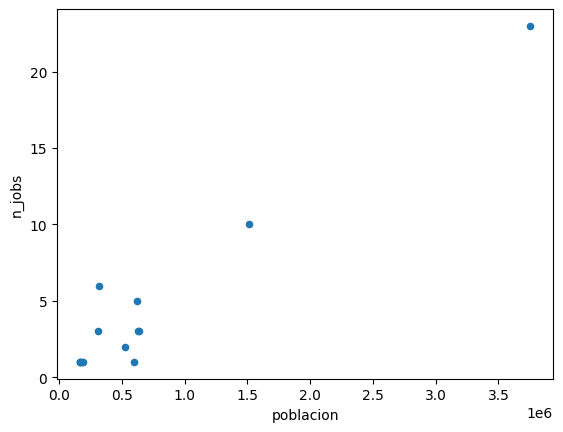

In [22]:
data_joined.plot.scatter("poblacion", "n_jobs")

## Comando para instalar librerías

In [23]:
%%capture
import sys

if 'lxml' not in sys.modules:
    !{sys.executable} -m pip install lxml
    
if 'html5lib' not in sys.modules:
    !{sys.executable} -m pip install html5lib

# Ejercicios

1) Extraer las ciudades de las 1200 primeras ofertas de arbeitnow

2) Buscar una API en public-apis y hacer un pequeño script que extraiga los datos. Si quieres un reto puedes intentar utilizar una API con contraseña